In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from ML_With_Pytorch_Scikit_learn_Sebastian.ch03.logistic_np import LogisticRegressionGD
from ML_With_Pytorch_Scikit_learn_Sebastian.ch02.plot_util import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import datasets, tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
import numpy as np
import pandas as pd
import polars as pl

# iris = datasets.load_iris(as_frame=True)
# df = pl.DataFrame(iris['data'])
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print("Class labels:", np.unique(y))
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

Class labels: [0 1 2]


 stratify=y. In this context,
stratification means that the train_test_split method returns training and test subsets that have the
same proportions of class labels as the input dataset.
if stratify is not set to y, the cell below will print , which means they are not in same proportions

Labels counts in y: [51,50,50]
Labels counts in y_train: [37,32,37]
Labels counts in y_test: [15,18,13]

In [2]:
print("Labels counts in y:", np.bincount(y))

print("Labels counts in y_train:", np.bincount(y_train))
print("Labels counts in y_test:", np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [3]:
sc = StandardScaler()
# Fit estimates the sample mean and standard deviation for each feature dimension
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)
print("Missclassified examples %d" % (y_test != y_pred).sum())

# Accuracy can be computed in 3 ways
print("Accuracy: %.4f" % accuracy_score(y_test, y_pred))

print("Accuracy: %.4f" % ppn.score(X_test_std, y_test))

Missclassified examples 1
Accuracy: 0.9778
Accuracy: 0.9778


[0 0 2 2 0 2 2 0 2 1 1 1 0 1 1 2 0 1 1 0 2 2 1 1 1 2 1 2 2 2 1 0 2 2 2 2 1
 2 2 0 2 0 2 0 0 1 0 0 2 1 0 1 1 0 0 0 1 2 0 1 0 1 2 0 0 1 2 1 1 1 2 1 1 2
 2 1 0 0 2 1 2 2 0 1 2 2 0 0 2 0 2 1 1 1 0 2 1 0 0 1 0 1 0 0 0] [2 0 0 2 1 1 2 1 2 0 0 2 0 1 0 1 2 1 1 2 2 0 1 2 1 1 1 2 0 2 0 0 1 1 2 2 0
 0 0 1 2 2 1 0 0]
[0 0 2 2 0 2 2 0 2 1 1 1 0 1 1 2 0 1 1 0 2 2 1 1 1 2 1 2 2 2 1 0 2 2 2 2 1
 2 2 0 2 0 2 0 0 1 0 0 2 1 0 1 1 0 0 0 1 2 0 1 0 1 2 0 0 1 2 1 1 1 2 1 1 2
 2 1 0 0 2 1 2 2 0 1 2 2 0 0 2 0 2 1 1 1 0 2 1 0 0 1 0 1 0 0 0 2 0 0 2 1 1
 2 1 2 0 0 2 0 1 0 1 2 1 1 2 2 0 1 2 1 1 1 2 0 2 0 0 1 1 2 2 0 0 0 1 2 2 1
 0 0]
[0 1 2]
0 0
1 1
2 2


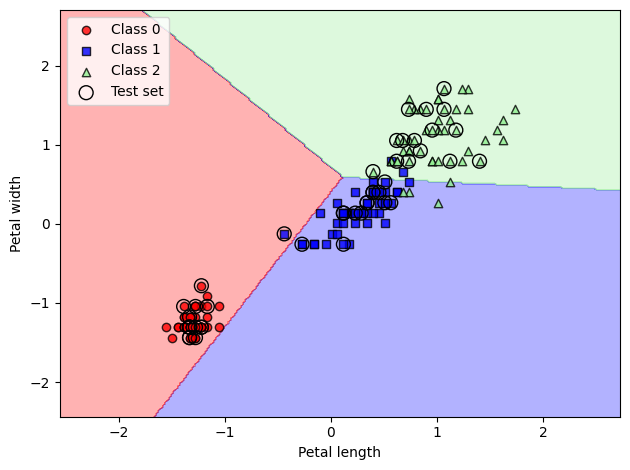

In [4]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
print(y_train, y_test)
print(y_combined)
print(np.unique(y_combined))
plot_decision_regions(
    X=X_combined_std,
    y=y_combined,
    classifier=ppn,
    test_idx=range(105, 150),
)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_389410/3529127542.py:21: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel("$\sigma(z)$")


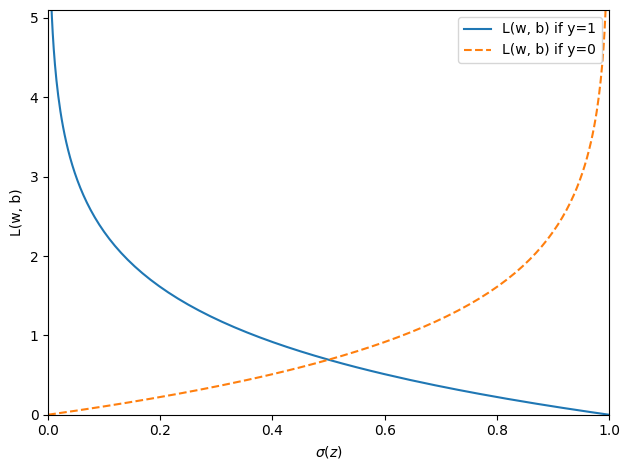

In [5]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))


def loss_1(z):
    return -np.log(sigmoid(z))


def loss_0(z):
    return -np.log(1 - sigmoid(z))


z = np.arange(-10, 10, 0.1)
sigma_z = sigmoid(z)
c2 = [loss_1(x) for x in z]
plt.plot(sigma_z, c2, label="L(w, b) if y=1")
c1 = [loss_0(x) for x in z]
plt.plot(sigma_z, c1, linestyle="--", label="L(w, b) if y=0")
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel("$\sigma(z)$")
plt.ylabel("L(w, b)")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

0 0
1 1


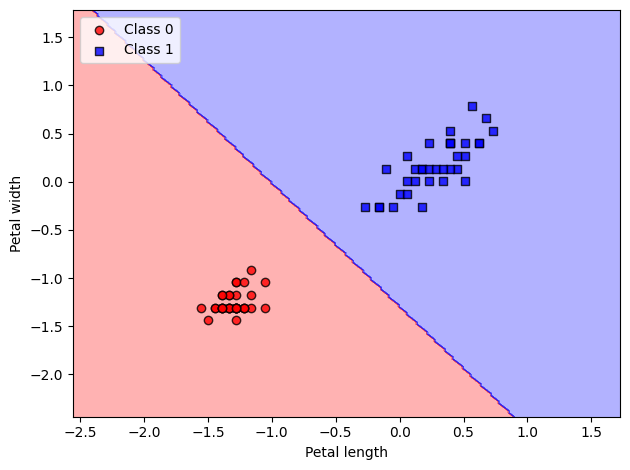

In [6]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.3, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)
plot_decision_regions(
    X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd
)

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

0 0
1 1


2 2


/home/itz-amethyst/venvs/global-venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


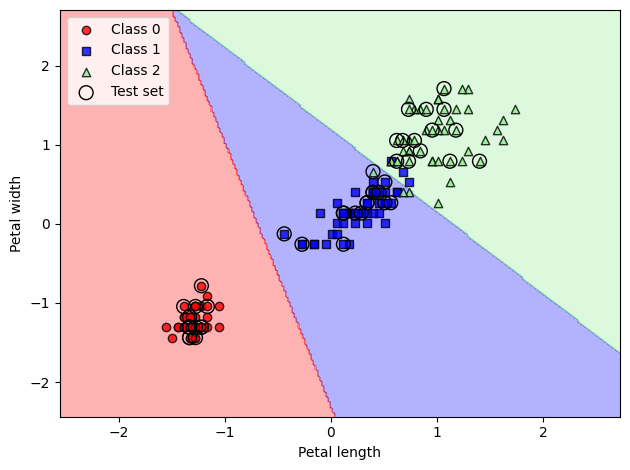

In [7]:
lr = LogisticRegression(C=100.0, solver="lbfgs", multi_class="ovr")
lr.fit(X_train_std, y_train)
plot_decision_regions(
    X_combined_std,
    y_combined,
    classifier=lr,
    test_idx=range(105, 150),
)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

In [8]:
# we can predict the probabilities before feding into the threshold for final answer
lr.predict_proba(X_test_std[:4, :])
# Column wise sum in each row is 2
lr.predict_proba(X_test_std[:4, :]).sum(axis=1)

# predict class labels by identifying the largest columns in each row
lr.predict_proba(X_test_std[:4, :]).argmax(axis=1)
lr.predict(X_test_std[:4, :])

lr.predict(X_test_std[10, :].reshape(1, -1))

array([0])

0 0
1 1
2 2


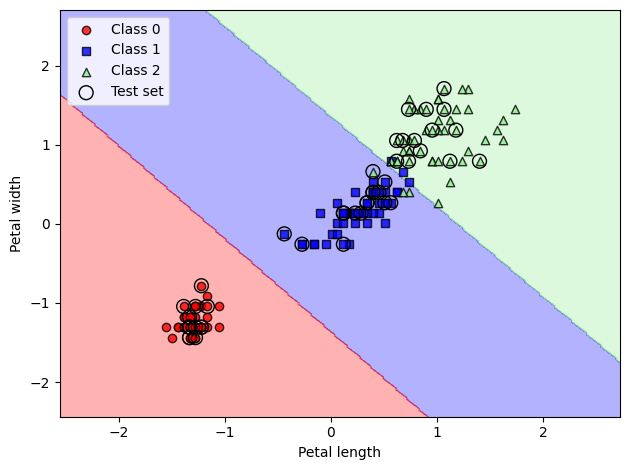

In [9]:
svm = SVC(C=1.0, kernel="linear", random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(
    X_combined_std,
    y_combined,
    classifier=svm,
    test_idx=range(105, 150),
)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

In [10]:
ppn = SGDClassifier(loss="perceptron")
lr = SGDClassifier(loss="log")
svm = SGDClassifier(loss="hinge")

## XOR

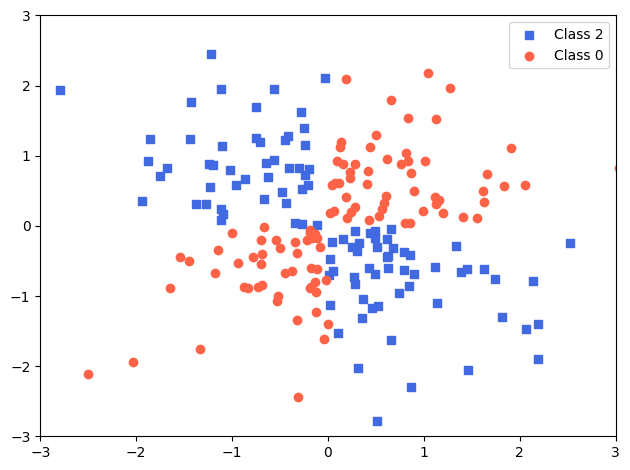

In [11]:
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)
plt.scatter(
    X_xor[y_xor == 1, 0],
    X_xor[y_xor == 1, 1],
    c="royalblue",
    marker="s",
    label="Class 2",
)
plt.scatter(
    X_xor[y_xor == 0, 0], X_xor[y_xor == 0, 1], c="tomato", marker="o", label="Class 0"
)
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc="best")
plt.tight_layout()
plt.show()



[1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 0
 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0
 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0
 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0
 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1]


0 0
1 1


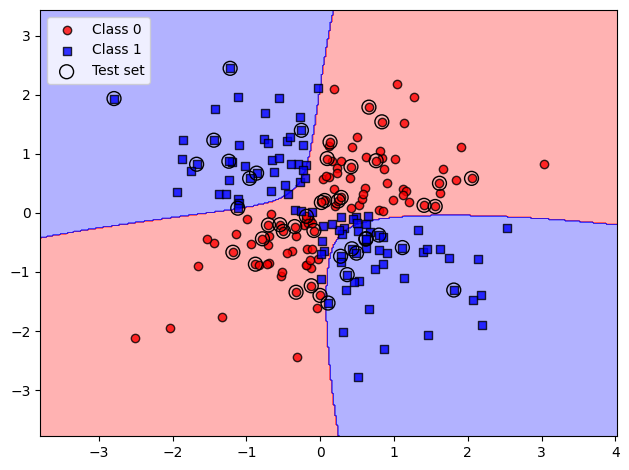

In [12]:
svm = SVC(kernel="rbf", random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
print(y_xor)

plot_decision_regions(
    X=X_xor,
    y=y_xor,
    classifier=svm,
    # target names should not be passed here ()
    test_idx=range(105, 150),
)
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()



## Testing different gamma hyperparameter and see it's influence

0 0
1 1
2 2


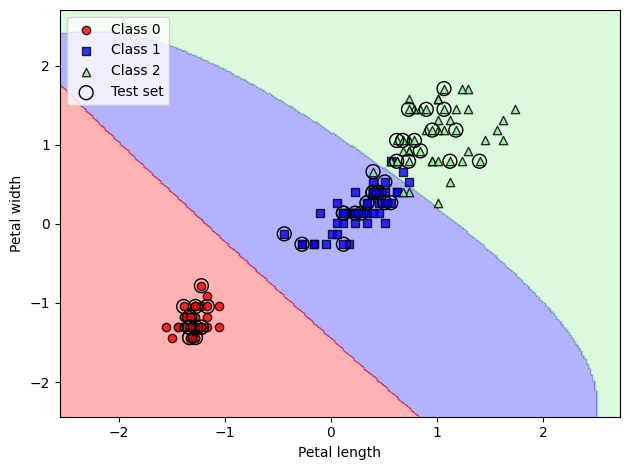

In [13]:
# Perfect gamma value
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(
    X_combined_std,
    y_combined,
    classifier=svm,
    test_idx=range(105, 150),
)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

0 0
1 1
2 2


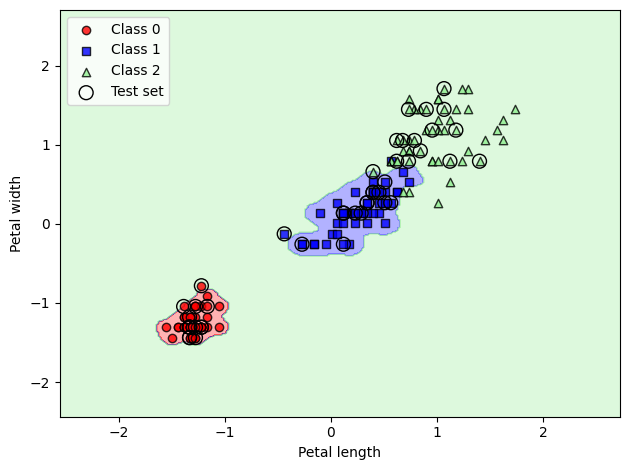

In [14]:
# Bad gamma value
svm = SVC(kernel='rbf', random_state=1, gamma=100, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(
    X_combined_std,
    y_combined,
    classifier=svm,
    test_idx=range(105, 150),
)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

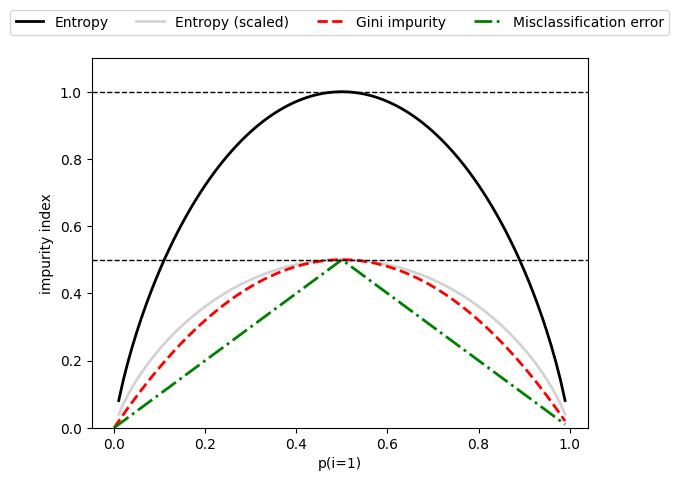

In [15]:
def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))


def entropy(p):
    return -p * np.log2(p) - (1 - p) * np.log2((1 - p))


def error(p):
    return 1 - np.max([p, 1 - p])


x = np.arange(0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)
for (
    i,
    lab,
    ls,
    c,
) in zip(
    [ent, sc_ent, gini(x), err],
    ["Entropy", "Entropy (scaled)", "Gini impurity", "Misclassification error"],
    ["-", "-", "--", "-."],
    ["black", "lightgray", "red", "green", "cyan"],
):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
ax.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, 1.15),
    ncol=5,
    fancybox=True,
    shadow=False,
)
ax.axhline(y=0.5, linewidth=1, color="k", linestyle="--")
ax.axhline(y=1.0, linewidth=1, color="k", linestyle="--")
plt.ylim([0, 1.1])
plt.xlabel("p(i=1)")
plt.ylabel("impurity index")
plt.show()

## Building a decision tree 

0 0
1 1
2 2


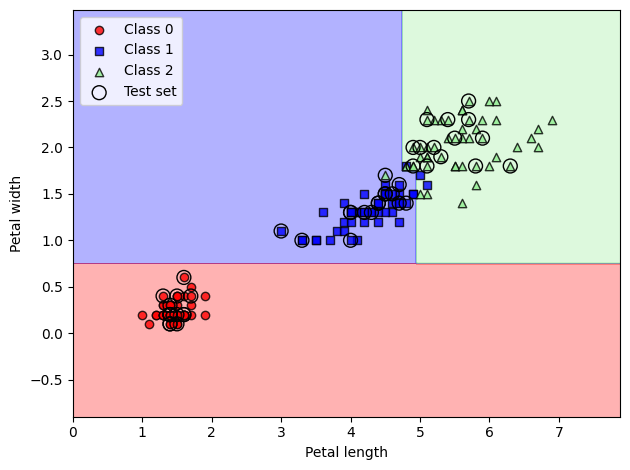

In [16]:
tree_model = DecisionTreeClassifier(criterion='gini', max_depth = 4, random_state=1)

tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree_model,  test_idx=range(105, 150))
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

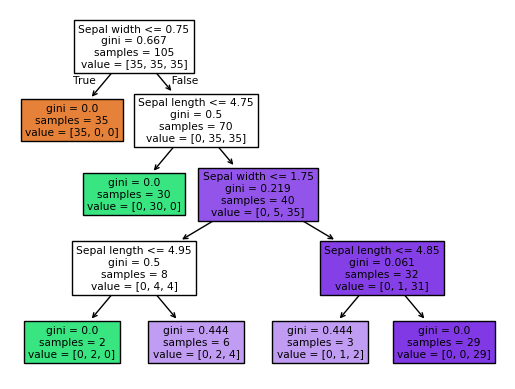

In [17]:
feature_names = ["Sepal length", 'Sepal width', 'Petal length', 'Petal width']
tree.plot_tree(tree_model, feature_names = feature_names, filled=True)
plt.show();

0 0
1 1
2 2


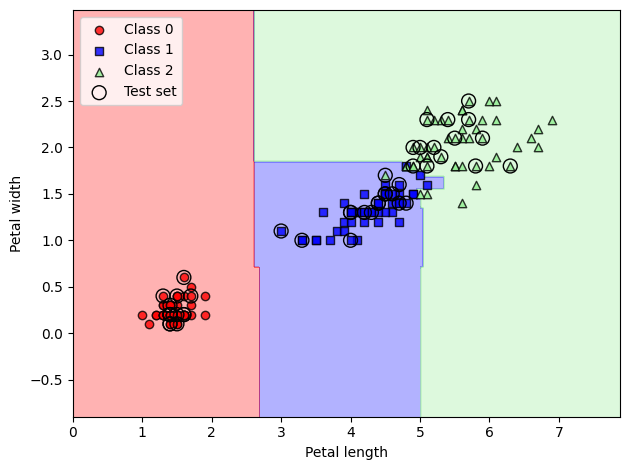

In [18]:
# Random forest
# n_estimators is the number of decision trees
forest = RandomForestClassifier(n_estimators=25, random_state=1, n_jobs=3)
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, classifier=forest,  test_idx=range(105, 150))
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

 #KNN

0 0
1 1
2 2


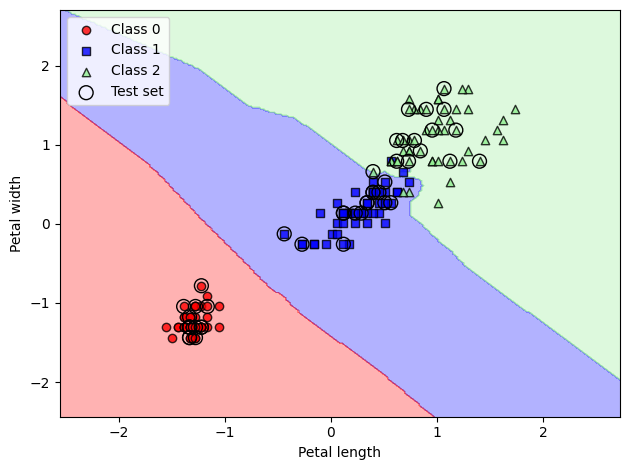

In [19]:
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105, 150))
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()